## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [42]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [45]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [48]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [51]:
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for variable in variables:
    diabetes_data[variable] = diabetes_data[variable].replace(0, np.nan)

diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

In [54]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

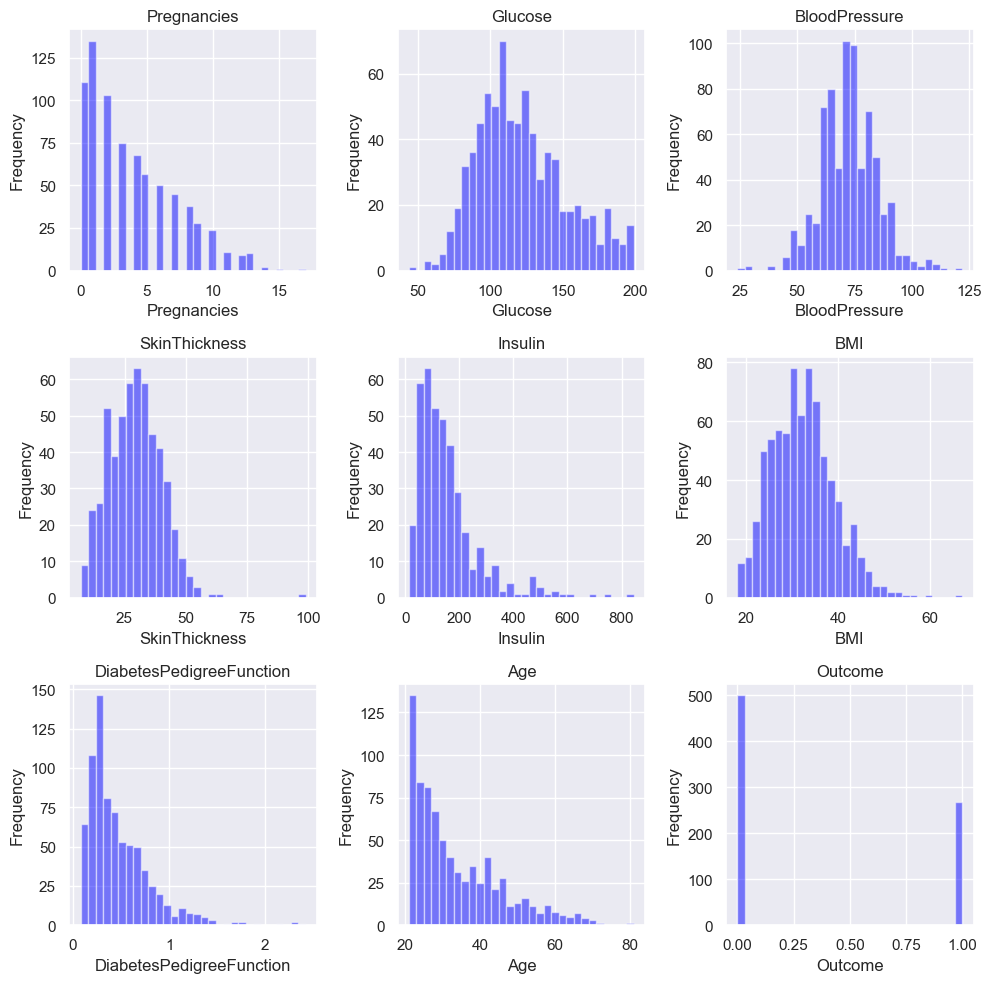

In [59]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a 3x3 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the columns and the axes simultaneously
for i, column in enumerate(columns):
    axes[i].hist(diabetes_data[column].dropna(), bins=30, color='blue', alpha=0.5) 
    axes[i].set_title(column)  
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [62]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

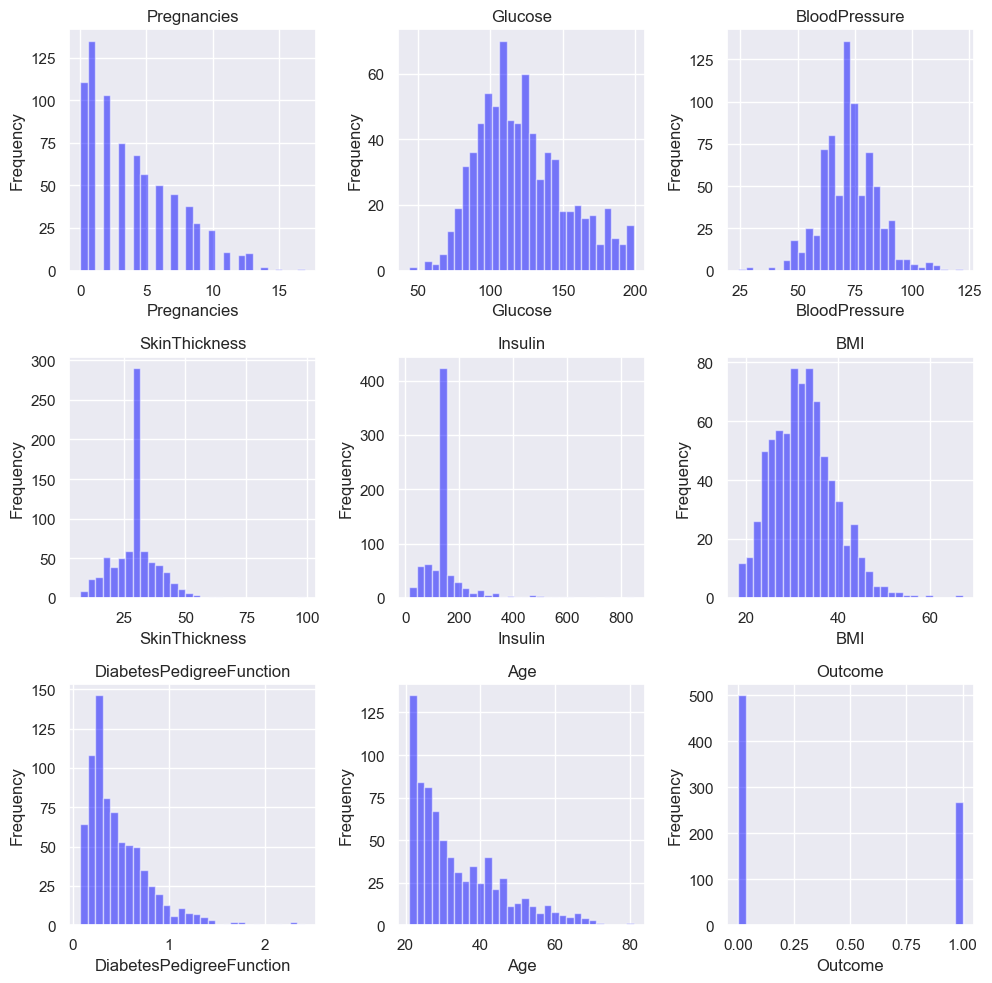

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a 3x3 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the columns and the axes simultaneously
for i, column in enumerate(columns):
    axes[i].hist(diabetes_data[column].dropna(), bins=30, color='blue', alpha=0.5) 
    axes[i].set_title(column)  
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


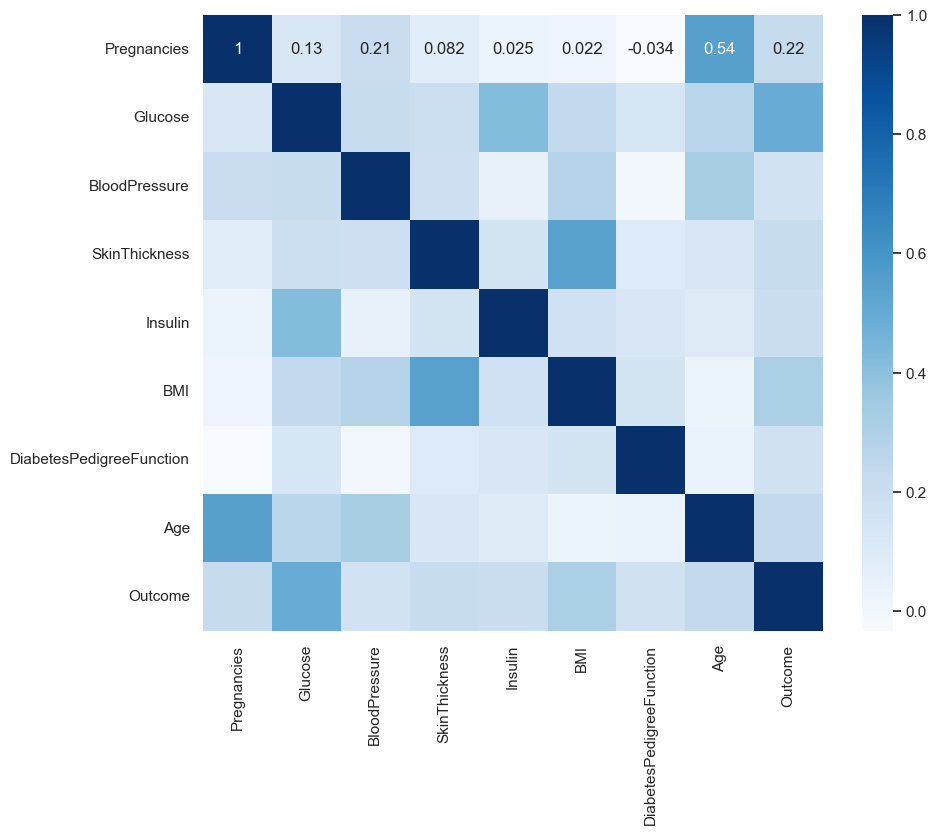

In [68]:
plt.figure(figsize=(10,8))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [71]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [139]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [81]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [96]:
# Create a DataFrame from the scores
scores_df = pd.DataFrame({
    'k': range(1, 10),
    'Train Score': train_scores,
    'Test Score': test_scores
})

scores_df

,k,Train Score,Test Score
0,1,1.000000,0.655844
1,2,0.846906,0.655844
2,3,0.842020,0.707792
3,4,0.819218,0.727273
4,5,0.827362,0.727273
5,6,0.807818,0.720779
6,7,0.817590,0.701299
7,8,0.807818,0.727273
8,9,0.812704,0.740260


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [100]:
# Identify the k that resulted in the highest training score
best_train_score = scores_df['Train Score'].max()
best_k = scores_df['k'][scores_df['Train Score'].idxmax()]

print(f'k={best_k}: Train Score = {best_train_score}')

k=1: Train Score = 1.0


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [102]:
# Identify the k that resulted in the highest test score
best_test_score = scores_df['Test Score'].max()
best_k = scores_df['k'][scores_df['Test Score'].idxmax()]

print(f'k={best_k}: Test Score = {best_test_score}')

k=9: Test Score = 0.7402597402597403


Plot the train and test model performance by number of neighbors.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

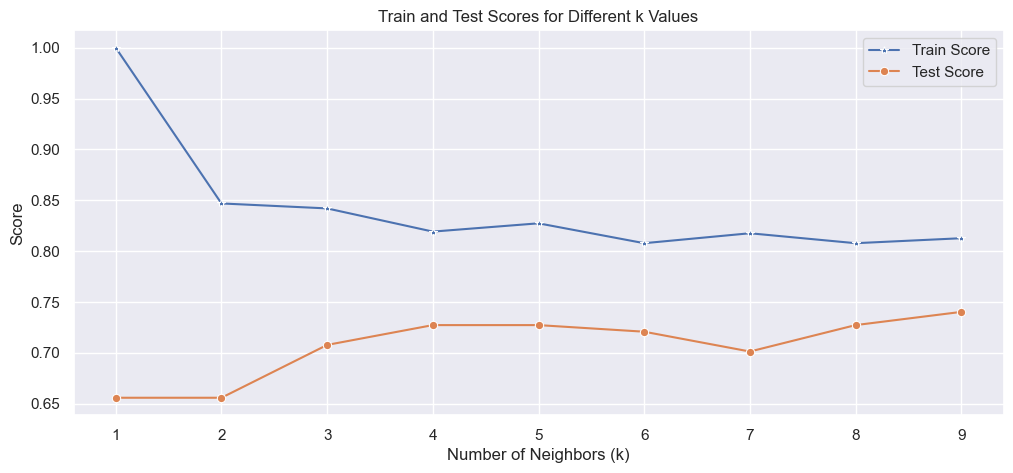

In [108]:
plt.figure(figsize=(12, 5))

# Plotting the train scores
p = sns.lineplot(x=list(range(1, 10)), y=train_scores, marker='*', label='Train Score')

# Plotting the test scores
p = sns.lineplot(x=list(range(1, 10)), y=test_scores, marker='o', label='Test Score')

# Add labels and title
p.set_xlabel('Number of Neighbors (k)')
p.set_ylabel('Score')
p.set_title('Train and Test Scores for Different k Values')
plt.legend()
plt.show()


**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [110]:
# Identify the best k based on the test scores
best_k = test_scores.index(max(test_scores)) + 1  # Adding 1 because the range starts at 1

# Fit the KNN classifier with the best number of neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Score the model
train_score_best_k = knn_best.score(X_train_scaled, y_train)
test_score_best_k = knn_best.score(X_test_scaled, y_test)

print(f'Best k = {best_k}')
print(f'Train Score for best k = {train_score_best_k:.4f}')
print(f'Test Score for best k = {test_score_best_k:.4f}')

Best k = 9
Train Score for best k = 0.8127
Test Score for best k = 0.7403


In [112]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [114]:
y_pred = knn_best.predict(X_test_scaled)  # Use the best model
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[77 22]
 [18 37]]


**<font color='teal'> Print the classification report </font>**

In [135]:
class_rep = classification_report(y_test, y_pred, labels=columns, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(class_rep)

                          precision    recall  f1-score   support

             Pregnancies       0.00      0.00      0.00         0
                 Glucose       0.00      0.00      0.00         0
           BloodPressure       0.00      0.00      0.00         0
           SkinThickness       0.00      0.00      0.00         0
                 Insulin       0.00      0.00      0.00         0
                     BMI       0.00      0.00      0.00         0
DiabetesPedigreeFunction       0.00      0.00      0.00         0
                     Age       0.00      0.00      0.00         0
                 Outcome       0.00      0.00      0.00         0

               micro avg       0.00      0.00      0.00         0
               macro avg       0.00      0.00      0.00         0
            weighted avg       0.00      0.00      0.00         0



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classif

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [161]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7734997029114676
Best Parameters: {'n_neighbors': 29}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Random Forest model.
</font>**

In [164]:
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
randomforest = RandomForestClassifier()

# Set up GridSearchCV
rf_cv = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5)

# Fit GridSearchCV on the data
rf_cv.fit(X, y)

# Output the best score and best parameters
print("Best Score: " + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score: 0.7761225702402174
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
